<a href="https://colab.research.google.com/github/alfredoaguiararce/covidapiproject/blob/main/Web_Scraping_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desarrollando una API de la COVID-19

En la actualidad nos encontramos con un significativo numero de datasets referentes al escenario de la COVID-19. Encontre interesante el crear por mi cuenta una API para disponer de esta informacion encontrada en [worldometers.com](https://www.worldometers.com) en una aplicacion de terceros.

Por cuiriosidad he decidido crear mi propio dataset  con ayuda de Python y algunas librerias.

Para ello hare uso de web scrapping que no es mas que un proceso para recolectar informacion de las paginas web, con base a peticiones HTTPS.

In [ ]:
# Instalar las librerias. En el espacio de desarrollo.
!pip install requests
!pip install beautifulsoup4

In [ ]:
# Paso 1 : Iniciar las librerias necesarias.
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

<bound method Tag.prettify of 
<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live Update: 176,031,691 Cases and 3,800,277 Deaths from the Coronavirus - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<
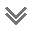

In [ ]:

# Paso 2 : Iniciar la peticion al sitio web de donde se obtendran los datos.
website = 'https://www.worldometers.info/coronavirus/#countries'
website_url = requests.get(website).text
soup = BeautifulSoup(website_url, 'html.parser')
soup.prettify

In [ ]:
children = soup.find_all('tr')
for child in children:
  print(child.find_all("td"))

[]
[<td></td>, <td style="text-align:left;">
<nobr>North America</nobr>
</td>, <td>40,132,810</td>, <td>+29,696</td>, <td>906,570</td>, <td>+764</td>, <td>33,216,378</td>, <td>+43,948</td>, <td>6,009,862</td>, <td>12,384</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>, <td data-continent="North America" style="display:none;">North America</td>, <td>
</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>]
[<td></td>, <td style="text-align:left;">
<nobr>Asia</nobr>
</td>, <td>53,247,730</td>, <td>+154,688</td>, <td>735,497</td>, <td>+5,126</td>, <td>50,199,256</td>, <td>+199,374</td>, <td>2,312,977</td>, <td>27,595</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>, <td data-continent="Asia" style="display:none;">Asia</td>, <td>
</td>, <td></td>, <td></td>, <td></td>, <td></td>, <td></td>]
[<td></td>, <td style="text-align:left;">
<nobr>South America</nobr>
</td>, <td>30,416,242</td>, <td>+164,366</td>, <td>937,676</td>, <td>+4,184</td>, <td>27,519,547</td>, <t

In [ ]:
# Paso 3 : Crear el DataFrame.
my_table = soup.find('tbody')
row = soup.find('td')
row

<td></td>

In [ ]:

table_data = []
for row in my_table.findAll('tr'):
    row_data = []
    row.info
    for cell in row.findAll('td'):
        row_data.append(cell.text)
    if(len(row_data) > 0):
        data_item = {"Country": row_data[1],
                     "TotalCases": row_data[2],
                     "NewCases": row_data[3],
                     "TotalDeaths": row_data[4],
                     "NewDeaths": row_data[5],
                     "TotalRecovered": row_data[6],
                     "ActiveCases": row_data[8],
                     "CriticalCases": row_data[9],
                     "Totcase1M": row_data[10],
                     "Totdeath1M": row_data[11],
                     "TotalTests": row_data[12],
                     "Tottest1M": row_data[13],
                     "Population": row_data[14]
        }
        table_data.append(data_item)

df = pd.DataFrame(table_data)

In [ ]:
# Eliminar las primeras 6 filas que eran datos que no necesitaba.
df = df.iloc[7:,] # Eliminar filas 0 al 6
df = df.reset_index(drop=True)  # Reseteamos los indices a 0,1,2...

In [ ]:
result = df.to_csv('covid_dataset.csv') # Convertir esa data en nuestro Data set .csv

In [ ]:
import json

result = df.to_json(orient="records")
parsed = json.loads(result)
json.dumps(parsed, indent=4)  


'[\n    {\n        "Country": "World",\n        "TotalCases": "176,031,491",\n        "NewCases": "+411,169",\n        "TotalDeaths": "3,800,271",\n        "NewDeaths": "+11,417",\n        "TotalRecovered": "159,933,313",\n        "ActiveCases": "12,297,907",\n        "CriticalCases": "84,188",\n        "Totcase1M": "22,583",\n        "Totdeath1M": "487.5",\n        "TotalTests": "",\n        "Tottest1M": "",\n        "Population": ""\n    },\n    {\n        "Country": "USA",\n        "TotalCases": "34,306,280",\n        "NewCases": "+15,928",\n        "TotalDeaths": "614,732 ",\n        "NewDeaths": "+421",\n        "TotalRecovered": "28,346,126",\n        "ActiveCases": "5,345,422",\n        "CriticalCases": "4,937",\n        "Totcase1M": "103,073",\n        "Totdeath1M": "1,847",\n        "TotalTests": "493,231,193",\n        "Tottest1M": "1,481,915",\n        "Population": "332,833,770 "\n    },\n    {\n        "Country": "India",\n        "TotalCases": "29,358,033",\n        "NewC